#Math & Probability

Flipping a coin: H, T (fair coin)  
Sequence 1: Flipping the Coin 3 times.  
{H, T, T}  
Sequence 2: Flipping the Coin 3 times.  
{H, H, H}  
Sequence 3: Flipping the Coin N times, where N is a very large number (in the range of millions)  {H, H, T, T, H, T, … , T,H,H,T}  
Sequence 4: Flipping the Coin N times, where N is a very large number (In the range of millions)  {H, H, H, H, H, H, H, … , H, H, H, H, H}  
Q1. Between sequences 1 and 2 which one is more probable? Between sequences 3 and 4 which one is  more probable?  
Q2. What is the probability of each sequence?  
Q3. How do you like that the probability of sequence 3 and sequence 4 are equal?  
Q4. Do you know how the last two sequences are related to the compression theory? 


##Q1 and Q2 Answer:
The probability is the same when the number of flips (N) is the same eg. (1/2)^N, since each flip has 1/2 probability of either heads or tails.

## Q3 Answer

However, the more you flip, the larger the number of possible combinations of tails/heads you can have (and you become less likely to get a specific number of heads). 

And, the ratio of heads to tails converges towards 1 as N increases.

The probability distribution becomes more spread out, and the interval for the number of heads containing 95% of the probability distribution will grow wider as the number of tosses increases.

The probability of getting k heads in N coin tosses can be calculated using the formula of binomial distribution of probability: 
$C_{k}^{n} * p^{k} * q^{n-k}$ where p = probability of getting head and q = probability of getting tail. Since p and q both are 1/2 the equation becomes $\frac{1}{2^n} * \frac{n!}{ k! * (n-k)!}$, which is coded below.

In [ ]:
def nck(n,k):
  def f(m):
    res = 1
    for i in range(2,m+1):
      res *= i
    return res
  
  tot = 1 / (2 ** n)
  tot *= f(n) / (f(k)* f(n-k))


  return tot

As shown below, the result is very small when k = 100 heads out of 100 tosses. But, its larger with less tosses.

In [ ]:
print(nck(100,100))

7.888609052210118e-31


In [ ]:
print(nck(10,10))

0.0009765625


In [ ]:
print(nck(5,5))

0.03125


## Q4 Answer

In compression theory we want to use fewer bits to represent/encode the data (eg. most data exhibits statistical redundancy). We can save space by using the probabilty of a particular value to occur in the dataset to set the code length.

 Knowing the probability distribution will help us derive the optimal compression scheme because we can compute the entropy of a given source.(Eg. Shannon showed that the optimal compression scheme produces binary strings of length roughly n*H(X) where H(X) is the entropy of X.)

There is a one-to-one corresspondance between probability mass functions and code length functions.

Eg. If we want to encode a random source X with many independent samples (x_1, ... x_n), the compression algorithm would encode each as a binary string which is reverible.

We can encode distribution P with -logP(x) bits, where x has a probaility of 2^-L(x).


#Programming and Data Structures:  
The input: a text file Input.txt (the number of lines in this file is very large 1010).   Each line contains one integer number between 0 and 1000.  
 e.g.,  
 1  
 122  
 124  
 17  
1  
 999  
 423  
The output is another text file:  
The number of rows = the number of unique integers in the input text file.  
Each line has the following format: Integer : Count  
 Output.txt  
 1: 2  
 122: 1  
 124: 1  
 17: 1  
 999:1  
 423:1  
### Write a program in Python / MatLab to solve this problem. Please do not use any built-in  functions.  



In [ ]:
# function to create a test input

import random #only using for creatng test file
def w_input(path: str, n_lines: int, max_int: int):
        print('Create a (smaller) demo input.txt file for testing in', path, '.')
        try:
            # wraps file into object instead of list (saves space/time)
            path = '/'.join([path,'input.txt'])
            with open(path,'w') as infile:
              for i in range(n_lines):
                infile.write(str(random.randint(0,max_int))+'\n')
        except:
            print('Something went wrong!')
            sys.exit(0) 

Due to the number of lines it may be helpful to parallelize this (esp. if we need to complete this same task multiple times). It would be easy to read separate chunks of the file on separate CPUs/cores and combine the counts from each on the master. Note, specific functions such as `seek `would need to be used to jump to the specific line to start on for each chunk to avoid overhead.

However, since we are to not use built in functions I am assuming that the parallel version doesnt need to be implemented here.

I am using `with` so it only reads the current line into RAM at a time
(and so we dont have to explicitly close the file). If we used `readlines()` then it would read everything into RAm before processing (possibly causing memory overflow errors).

In [ ]:
# function to produce output file by storing count values in a hash table
import os # only using for size info
def rw_output(input_path, output_path):
    h = {}
    path = '/'.join([input_path,'input.txt'])
    print(f'File Size is {os.stat(path).st_size / (1024 * 1024)} MB')
    with open(path,'r') as infile:
      for line in infile: 
        h[line] = h.get(line,0) + 1
    print('Creating the output file in', output_path, 'as specified.')
    try:
        path = '/'.join([output_path,'output.txt'])
        # using with so it only reads current line into memory
        # and so we dont have to explicitly close
        with open(path,'w') as outfile:
          for i in h:
              outfile.write(i.strip()+':'+str(h[i])+'\n')
    except:
        print('Something went wrong.')
        sys.exit(0) 

In [ ]:
# function to produce output file by storing count values in a list
import os # only using for size info
def rw_output2(input_path, output_path):
    h = [0 for i in range(1001)]
    path = '/'.join([input_path,'input.txt'])
    print(f'File Size is {os.stat(path).st_size / (1024 * 1024)} MB')
    with open(path,'r') as infile:
      for line in infile:
        num= int(line) 
        #print(num)
        h[num] += 1
    print('Creating the output file in', output_path, 'as specified.')
    try:
        path = '/'.join([output_path,'output.txt'])
        with open(path,'w') as outfile: 
          for i in range(len(h)):
            if i > 0:
              outfile.write(str(i)+':'+str(h[i])+'\n')
    except:
        print('Something went wrong.')
        sys.exit(0) 

In [ ]:
w_input('/content', 10000,1000)

Create a (smaller) demo input.txt file for testing in /content .


In [ ]:
import time

start = time.time()
rw_output('/content', '/content')
end = time.time()
h_tot = end - start
print("Execution time in seconds when values stored in hash: ",h_tot)

File Size is 0.03709602355957031 MB
Creating the output file in /content as specified.
Execution time in seconds when values stored in hash:  0.012187480926513672


In [ ]:
start = time.time()
rw_output2('/content', '/content')
end = time.time()
list_tot=end - start
print("Execution time in seconds when values stored in list: ",list_tot)

File Size is 0.03709602355957031 MB
Creating the output file in /content as specified.
Execution time in seconds when values stored in list:  0.013902664184570312


### If the numbers are not in the range 0 to 1000, but I guarantee that maximum there is 1000  unique numbers? Does this change the problem Or how to solve it?  
1  
 122  
 124546545645646545  
 17  
1  
 99954594654646545  
 423  
 


If we are storing the counts in a list (eg. where the index i is the unique number as the second fucntion above), we would not want to use the actual values for i (eg. create an arbitrarily huge list, increasing the time complexity beyond n=1000 to create one of that length).


It would be better to stick with the hash table in this case as in the first example above (or create ones own hash table using a list of length 1000). And, if they are too long to be used as keys this might help as well.

 Also, if there is a lot of data in each line we should use a buffer (eg. `input_file.read(chunk_size)`)to read in each line in order to avoid ovelroading memory.


### What if there is no guarantee about the maximum number of unique integers, does this change  the problem or how to solve it? 

This is another reason to use the hash table version to store the counts (and not a list). If we have an arbitrary numbers of unique numbers then not only would we have to create our own hash function (for list index values to inputs), but we wouldn't know what size to initalize a list to (unless we knew the length of the file). Therefore, if we try to access/update a specific value it could cause an error (if the list isnt big enough). Further, there is a maximum list length as shown in the next problem.

# Math and Programming:

 A combination of Math and Programming.  The input X is a very large positive number, e.g., $X=10^{15}$ 
The output Y = how many primary numbers are greater than 0 and less than X.  For example, if X=10. Primary numbers = 2, 3, 5, 7. Y= 4  
Write a program in Python / MatLab to solve this problem. Do not use any built-in functions.


## Answer:


The Sieve below is ok for numbers up to around $10^{8}$, since we dont have to compute as many because we mark more as not prime on each iteration. However, since using this method alone we still must allocate N space (to store all primes at once) it wont work for $10^{15}$

Therefore, a modified (segmented) version of Seive should be used to compute only segments of the primes at once. In the segmented verison we only allocate the square root of N space store primes up the square root of N, plus another sub-segment of the full set of primes. This can be used to incrementally calculate only specific portions of the rest of the output/primes at a time.

However, since this does not reduce the time complexity, it would be easy to parallelize this by computing the segments on multiple nodes or to allow for an input settings to set the size of the segments (to process individually).

In [ ]:
import math
def sieve(lim):
    primes = []

    m = [True for i in range(lim + 1)]
    p = 2

    while (p * p <= lim): # p is highest multiple of p to fit in lim
        if (m[p] == True):

            # Mark multiples of primes as not prime
            # start at p^2 since we already got it if multiple is less than p
            for i in range(p * p, lim + 1, p):
                m[i] = False
        p += 1
    for p in range(2, lim):
        # create an array of only primes since we need to iterate 
        # over the whole thing below
        if m[p]:
            primes.append(p)

    m = None
    #print(len(primes))
    return primes


def segmented(n):

    seg = int(math.floor(math.sqrt(n)) + 1) 
    primes = sieve(seg)
    count = len(primes) # start with primes count in initial segment


    # we could have an input to set this range to run in parallel or sequential
    # and then add the counts from each set of segments at the end
    # or if we only need a range we can start low at a higher number
    low = seg
    high = seg + low

    while low < n:
        if high >= n:
            high = n # in case it goes over 

        # init array to hold current segment:
        m = [True for i in range(seg + 1)]

        # for each prime num below sq root 
        for i in range(len(primes)):

            loL = int(math.floor(low / primes[i]) * primes[i])

            if loL < low:
                loL += primes[i] # find first multiple in segemnt

            # mark each multiple of each prime which is in the segment range
            # as not prime
            for j in range(loL, high, primes[i]):
                if m[j - low] != False:
                  m[j - low] = False

        # total the number in this segment before moving to the next segment
        # and removing the m array
        for i in range(low, high):
             if m[i - low]:
               count += 1

        # set first and last index of nnext segment
        low = low + seg
        high = high + seg
       

    return count

In [ ]:
print(segmented(10000000))

664579


#Image processing and computer vision: 
Using image processing and basic image operations to solve a  computer vision problem.  
This is a picture of different objects (white objects) from the production environment. Each object can  be a circle, rectangle, triangle, square, … etc. some of these objects are defective (contains holes). In  some cases, it is only one hole, in other cases, there are multiple holes. 


Write a program to read this image as an input and print out:  
1- How many objects have zero holes, one hole, two holes, three holes, … etc.  e.g.,  
zero holes: 16 objects  
One hole: 9 objects  
Two holes: 2 objects  
Three holes: 2 objects  
Four holes: 1 object 


In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread('/content/test.png', 0)

In [ ]:
import matplotlib.pyplot as plt
#img=cv2.imread('/content/test2.png')

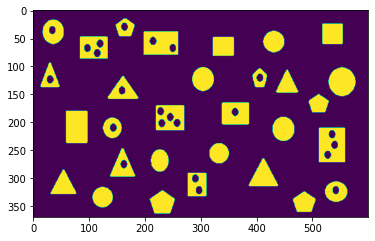

In [ ]:
#RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
#Displaying image using plt.imshow() method
plt.imshow(thresh_img)

In [ ]:
img2 = cv2.resize(img, (800, int(800/h)*w))

In [ ]:
img2.shape


(994, 800, 3)

In [ ]:
img = cv2.imread('/content/test.png', 0)

# make sure all pixels completely black/white
ret, thresh_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)


print(np.amin(thresh_img))
print(np.amax(thresh_img))

# find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

0
255


In [ ]:
counts = [0 for i in range(5)]
word_nums = ['Zero','One', 'Two', 'Three', 'Four']
max_num = np.amax(hierarchy) + 1

for c, h in zip(contours, hierarchy[0]):

    # if there is an interior contour
    if h[2] != -1:

        # count holes (if not the zero contour)
        if h[0] != -1:
          num_holes = h[0]-h[2]
          print('num_holes', num_holes)
          print('h[0],h[2]', h[0],h[2])
        elif h[0] == -1:
          num_holes = max_num - h[2] 
          print('h[0] == -1 num_holes', num_holes)
          print('h[2]', h[2])
        counts[num_holes] += 1
    
    elif h[2] == -1 and h[3] == -1: 
      num_holes = 0
      print('test')
      counts[num_holes] += 1


for i in range(len(counts)):
  print(word_nums[i],'hole(s):', counts[i], 'objects')

test
test
test
num_holes 1
h[0],h[2] 5 4
num_holes 2
h[0],h[2] 8 6
test
test
test
num_holes 1
h[0],h[2] 13 12
test
num_holes 3
h[0],h[2] 18 15
num_holes 1
h[0],h[2] 20 19
test
test
num_holes 4
h[0],h[2] 27 23
num_holes 1
h[0],h[2] 29 28
test
num_holes 1
h[0],h[2] 32 31
test
num_holes 1
h[0],h[2] 35 34
test
test
num_holes 1
h[0],h[2] 39 38
test
num_holes 3
h[0],h[2] 44 41
num_holes 2
h[0],h[2] 47 45
test
test
num_holes 1
h[0],h[2] 51 50
h[0] == -1 num_holes 1
h[2] 52
Zero hole(s): 16 objects
One hole(s): 9 objects
Two hole(s): 2 objects
Three hole(s): 2 objects
Four hole(s): 1 objects
